# DS : CHE



# Week-1 Assignment

**Welcome to your first assignment of SimuTech Winter Project 2022! I hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about properties of superheated vapor.**

The dataset consists of the thermophysical properties: specific volume, specific internal energy, specific enthalpy, specific entropy of superheated vapor.

Pressure is in kPa and Temperature in centigrade. In the dataframe 75, 100, 125 are temperatures.

**There are some interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas and matplotlib!***

### 1) Import all the libraries

In [2]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### 2) Read the csv file.

In [3]:
#your code here
df = pd.read_csv("./superheated_vapor_properties.csv")

### 3) Display shape of dataframe


In [4]:
#your code here
df.shape

(544, 37)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [5]:
#your code here
df.columns

Index(['Pressure', 'Property', 'Liq_Sat', 'Vap_Sat', '75', '100', '125', '150',
       '175', '200', '220', '225', '240', '250', '260', '275', '280', '290',
       '300', '320', '325', '340', '350', '360', '375', '380', '400', '425',
       '450', '475', '500', '525', '550', '575', '600', '625', '650'],
      dtype='object')

### 5) Display the number of null values in each column of the dataframe

In [6]:
#your code here
print(df.isna().sum())

Pressure      0
Property      0
Liq_Sat       0
Vap_Sat       0
75          528
100         508
125         488
150         448
175         384
200         320
220         408
225         400
240         408
250         344
260         384
275         340
280         380
290         488
300          60
320         480
325         136
340         476
350          68
360         476
375         204
380         476
400           0
425         204
450           0
475         204
500           0
525         272
550           0
575         340
600           0
625         476
650           0
dtype: int64


###  6) Print a list of all the unique items in the Property column

In [7]:
#your code here
df["Property"].unique()

array(['V', 'U', 'H', 'S'], dtype=object)

### 7) Create a column which contains the Pressure and Property columns, seperated with 'at' (For eg. V at 1, H at 101.325). Using this print the following:
- Enthalpy at 75 kPa and 573 K
- Entropy at 493 K and 250 kPa

In [52]:
#your code here
df["Remark"] = df.apply(lambda row: row.Property + " at " + str(row.Pressure), axis=1)

val1 = df[df["Remark"]=="H at 75.0"].dropna(subset=["Remark"]).to_dict('records')[0]
val2 = df[df["Remark"]=="S at 250.0"].dropna(subset=["Remark"]).to_dict('records')[0]
if('573' in val1):
    prop1 = val1['573']
else:
    p = val1['550']
    q = val1['575']
    prop1 = (q-p)*23/25 + p
# print(val1)
print("Enthalpy at " + str(val1["Pressure"]) + " kPa and 573 K is: ",prop1)

if('493' in val2):
    prop2 = val2['493']
else:
    p = val1['475']
    q = val1['500']
    prop2 = (q-p)*23/25 + p

# print(val2)
print("Entropy at " + str(val2["Pressure"]) + " kPa and 493 K is: ",prop2)

{'Pressure': 75.0, 'Property': 'H', 'Liq_Sat': 384.451, 'Vap_Sat': 2663.0, '75': nan, '100': 2679.4, '125': 2728.9, '150': 2778.2, '175': 2827.4, '200': 2876.6, '220': nan, '225': 2925.8, '240': nan, '250': 2975.3, '260': nan, '275': nan, '280': nan, '290': nan, '300': 3075.1, '320': nan, '325': nan, '340': nan, '350': 3176.1, '360': nan, '375': nan, '380': nan, '400': 3278.6, '425': nan, '450': 3382.7, '475': nan, '500': 3488.4, '525': nan, '550': 3595.8, '575': nan, '600': 3705.0, '625': nan, '650': 3815.9, 'Remark': 'H at 75.0'}
Enthalpy at 75.0 kPa and 573 K is:  nan
{'Pressure': 250.0, 'Property': 'S', 'Liq_Sat': 1.6071, 'Vap_Sat': 7.052, '75': nan, '100': nan, '125': nan, '150': 7.1689, '175': 7.2886, '200': 7.4001, '220': nan, '225': 7.505, '240': nan, '250': 7.6042, '260': nan, '275': nan, '280': nan, '290': nan, '300': 7.7891, '320': nan, '325': nan, '340': nan, '350': 7.9597, '360': nan, '375': nan, '380': nan, '400': 8.1188, '425': nan, '450': 8.2686, '475': nan, '500': 8.41

### 8) Find out the column with the highest number of missing values

In [12]:
#your code here

#method 1
print("Column with highest no of missing values using mathod #1 is: " + df.columns[df.isna().sum().argmax()])

#method 2
max = -1
max_item = -1
for item in df.columns:
    t = df[item].isna().sum()
    if(t>max):
        max = t
        max_item = item
print ("Column with highest no of missing values using mehtod #2 is: " + max_item)

Column with highest no of missing values using mathod #1 is: 75
Column with highest no of missing values using mehtod #2 is: 75


### 9) What is the average enthalpy of Sat. Liq. at all different pressures in the dataset ?

In [13]:
#your code here
print (np.array(df.where(df["Property"]=="H")["Liq_Sat"]).mean())

print (np.array(df.where(df["Property"]=="H")["Liq_Sat"].dropna()).mean())

nan
936.9707720588235


### 10) Separate out the V,U,H,S data from the dataset into V_data, U_data, H_data, S_data

In [14]:
#your code here
V_data = df.where(df["Property"]=="V").dropna(subset=["Property"])
U_data = df.where(df["Property"]=="U").dropna(subset=["Property"])
H_data = df.where(df["Property"]=="H").dropna(subset=["Property"])
S_data = df.where(df["Property"]=="S").dropna(subset=["Property"])
print("V_data => " , V_data)
print("U_data => " , U_data)
print("H_data => " , H_data)
print("S_data => " , S_data)

V_data =>       Pressure Property  Liq_Sat     Vap_Sat        75       100       125  \
0         1.0        V    1.000  129200.000  160640.0  172180.0  183720.0   
4        10.0        V    1.010   14670.000   16030.0   17190.0   18350.0   
8        20.0        V    1.017    7649.800    8000.0    8584.7    9167.1   
12       30.0        V    1.022    5229.300    5322.0    5714.4    6104.6   
16       40.0        V    1.027    3993.400       NaN    4279.2    4573.3   
..        ...      ...      ...         ...       ...       ...       ...   
524   10600.0        V    1.474      16.778       NaN       NaN       NaN   
528   10800.0        V    1.481      16.385       NaN       NaN       NaN   
532   11000.0        V    1.489      16.006       NaN       NaN       NaN   
536   11200.0        V    1.496      15.639       NaN       NaN       NaN   
540   11400.0        V    1.504      15.284       NaN       NaN       NaN   

          150       175       200  ...         450     475      

### 11) Plot the properties (specific volume, specific internal energy, specific enthalpy, specific entropy) vs Pressure for saturated liquid.

Note: 
- Try using the subplot feature of matplotlib(Explore it!!)
- Provide appropriate title, labels, markersize and other parameters to the plot 

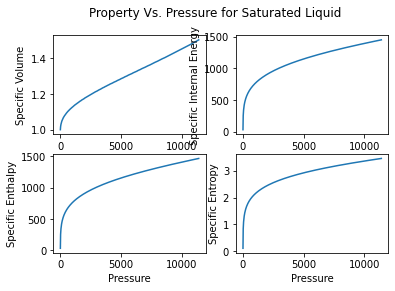

In [15]:
#your code here

#subplot 1
x = np.array(V_data["Pressure"])
y = np.array(V_data["Liq_Sat"])
plt.subplot(2,2,1)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Volume")

#subplot 2
x = np.array(U_data["Pressure"])
y = np.array(U_data["Liq_Sat"])
plt.subplot(2,2,2)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Internal Energy")

#subplot 3
x = np.array(H_data["Pressure"])
y = np.array(H_data["Liq_Sat"])
plt.subplot(2,2,3)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Enthalpy")

#subplot 4
x = np.array(S_data["Pressure"])
y = np.array(S_data["Liq_Sat"])
plt.subplot(2,2,4)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Entropy")

plt.suptitle("Property Vs. Pressure for Saturated Liquid")
plt.show()

### 12) Plot the same for saturated vapor.

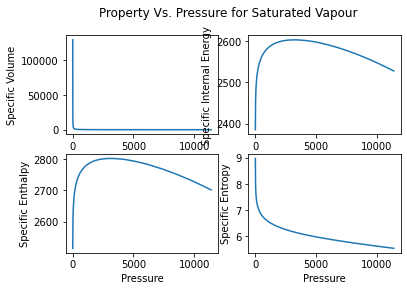

In [16]:
#your code here
#your code here

#subplot 1
x = np.array(V_data["Pressure"])
y = np.array(V_data["Vap_Sat"])
plt.subplot(2,2,1)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Volume")

#subplot 2
x = np.array(U_data["Pressure"])
y = np.array(U_data["Vap_Sat"])
plt.subplot(2,2,2)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Internal Energy")

#subplot 3
x = np.array(H_data["Pressure"])
y = np.array(H_data["Vap_Sat"])
plt.subplot(2,2,3)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Enthalpy")

#subplot 4
x = np.array(S_data["Pressure"])
y = np.array(S_data["Vap_Sat"])
plt.subplot(2,2,4)
plt.plot(x,y)
plt.xlabel("Pressure")
plt.ylabel("Specific Entropy")

plt.suptitle("Property Vs. Pressure for Saturated Vapour")
plt.show()

### 13) Plot the specific volume of saturated liquid between 300 kPa and 1500 kPa

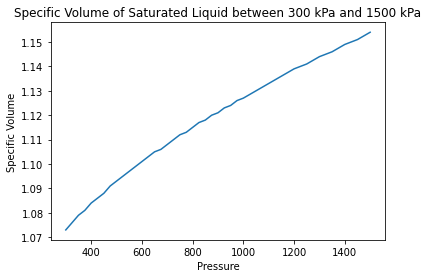

In [17]:
#your code here
x = np.array(V_data["Pressure"])
y = np.array(V_data["Liq_Sat"])
ind_x = np.where(np.logical_and(x>=300, x<=1500))

plt.plot(x[ind_x],y[ind_x])
plt.xlabel("Pressure")
plt.ylabel("Specific Volume")

plt.title("Specific Volume of Saturated Liquid between 300 kPa and 1500 kPa")
plt.show()

## Playing with Numpy

### 14) Implement the derivative of the sigmoid function using numpy. 

Note: 
- Read about sigmoid function over the internet.
- Input of the function can be a scalar or a numpy array.

**Test Case:**

**Input:**

 [[9, 2, 5, 0, 0]

   [7, 5, 0, 0, 0]]

Output:

[[0.99987661, 0.88079708, 0.99330715, 0.5, 0.5 ]

[0.99908895, 0.99330715, 0.5,  0.5,  0.5 ]]

In [18]:
#your code here
def sig_der(a):
    a = np.array(a)
    sig = (1/(1+np.exp(-a)))
    ans = sig * (1 - sig)
    return ans

t = [[9, 2, 5, 0, 0],[7, 5, 0, 0, 0]]
print(sig_der(t))

[[1.23379350e-04 1.04993585e-01 6.64805667e-03 2.50000000e-01
  2.50000000e-01]
 [9.10221180e-04 6.64805667e-03 2.50000000e-01 2.50000000e-01
  2.50000000e-01]]


### 15) Define a function which takes in a a numpy array of shape (length, height, depth) and returns a vector of shape (length\*height*depth, 1)


In [20]:
#your code here
def vectorise(a):
    a = np.array(a)
    s = math.prod(a.shape)

    ans = a.reshape((s,1))
    return ans
t1 = vectorise(t)
print(t)
print(t1)

[[9, 2, 5, 0, 0], [7, 5, 0, 0, 0]]
[[9]
 [2]
 [5]
 [0]
 [0]
 [7]
 [5]
 [0]
 [0]
 [0]]


### 16) Define a softmax function that calculates the softmax for each row of the input x.

Note:
- The code should work for a row vector and also for matrices of shape (n, m)

**Test Case:**

**Input:**

 [[9 2 5 0 0]

   [7 5 0 0 0]]

Output:

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]

 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]

In [21]:
#your code here
def softmax(a):
    a = np.array(a)
    ans = np.zeros(a.shape)
    for i,item in enumerate(a):
        ans[i] = np.exp(item)
    ans = ans/ans.sum(axis=1).reshape(-1,1)
    return ans
t = [[9, 2, 5, 0, 0],[7,5,0,0,0]]
softmax(t)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])